<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/MeenakshiPoorani/formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team 19:

We are creating a Hypothesis from Formula 1 Data Sets recruiting for a specic constructor by analyzing and focusing on Data from the following files:

*driver *results *lap times

We are going to do a basic analysis of the top ten drivers.

How many wins they have from the previous season for 2023? The average race lap times for the 2023 per driver?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import fastf1



In [5]:
pip install fastf1

Read files

In [7]:
results = pd.read_csv('/content/formula1/results.csv')
races=pd.read_csv('/content/formula1/races.csv')
drivers=pd.read_csv('/content/formula1/drivers.csv')
constructors=pd.read_csv('/content/formula1/constructors.csv')
status=pd.read_csv('/content/formula1/status.csv')
driver_standings=pd.read_csv('/content/formula1/driver_standings.csv')

In [ ]:
drivers.head()

In [8]:
# prompt: top 5 drivers performance


# Group the results by driver and calculate the sum of points
driver_points = results.groupby('driverId')['points'].sum()

# Sort the drivers by points in descending order
sorted_drivers = driver_points.sort_values(ascending=False)

# Print the top 5 drivers and their points
print(sorted_drivers.head(5))


driverId
1      4540.5
20     3098.0
830    2275.5
4      2203.0
8      1873.0
Name: points, dtype: float64


Merging all columns

# New Section

In [9]:
df = pd.merge(results,races[['raceId','year','name','round','date']],on = 'raceId',how = 'left')
df=pd.merge(df,drivers[['driverId','driverRef','forename','surname','nationality','dob']],on='driverId',how='left')
df=pd.merge(df,constructors[['constructorId','name','nationality']],on='constructorId',how='left')
df=pd.merge(df,status[['statusId','status']],on='statusId',how='left')
pd.get_option("display.max_columns",None)
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,round,date,driverRef,forename,surname,nationality_x,dob,name_y,nationality_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07,McLaren,British,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10,BMW Sauber,German,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27,Williams,British,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29,Renault,French,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19,McLaren,British,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31,Williams,British,Finished
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19,Haas F1 Team,American,Finished
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage


Driver Name

In [10]:
df['driverName']=df['forename']+ ' '+ df['surname']
df.drop(['forename','surname'],axis=1,inplace=True)

Top drivers in 2023

In [11]:


# Filter data for 2023
df_2023 = df[df['year'] == 2023]


# Group by driver and sum points
driver_points_2023 = df_2023.groupby('driverRef')['points'].sum()

# Sort by points in descending order
sorted_drivers_2023 = driver_points_2023.sort_values(ascending=False)

# Print the top 5 drivers and their points
print(sorted_drivers_2023.head(10))


driverRef
max_verstappen    292.0
perez             174.0
hamilton          144.0
alonso            142.0
russell            92.0
leclerc            88.0
sainz              77.0
norris             66.0
stroll             41.0
ocon               33.0
Name: points, dtype: float64


In [13]:
df_2023.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,name_x,round,date,driverRef,nationality_x,dob,name_y,nationality_y,status,driverName
25840,25846,1098,830,9,1,1,1,1,1,25.0,...,Bahrain Grand Prix,1,2023-03-05,max_verstappen,Dutch,1997-09-30,Red Bull,Austrian,Finished,Max Verstappen
25841,25847,1098,815,9,11,2,2,2,2,18.0,...,Bahrain Grand Prix,1,2023-03-05,perez,Mexican,1990-01-26,Red Bull,Austrian,Finished,Sergio Pérez
25842,25848,1098,4,117,14,5,3,3,3,15.0,...,Bahrain Grand Prix,1,2023-03-05,alonso,Spanish,1981-07-29,Aston Martin,British,Finished,Fernando Alonso
25843,25849,1098,832,6,55,4,4,4,4,12.0,...,Bahrain Grand Prix,1,2023-03-05,sainz,Spanish,1994-09-01,Ferrari,Italian,Finished,Carlos Sainz
25844,25850,1098,1,131,44,7,5,5,5,10.0,...,Bahrain Grand Prix,1,2023-03-05,hamilton,British,1985-01-07,Mercedes,German,Finished,Lewis Hamilton


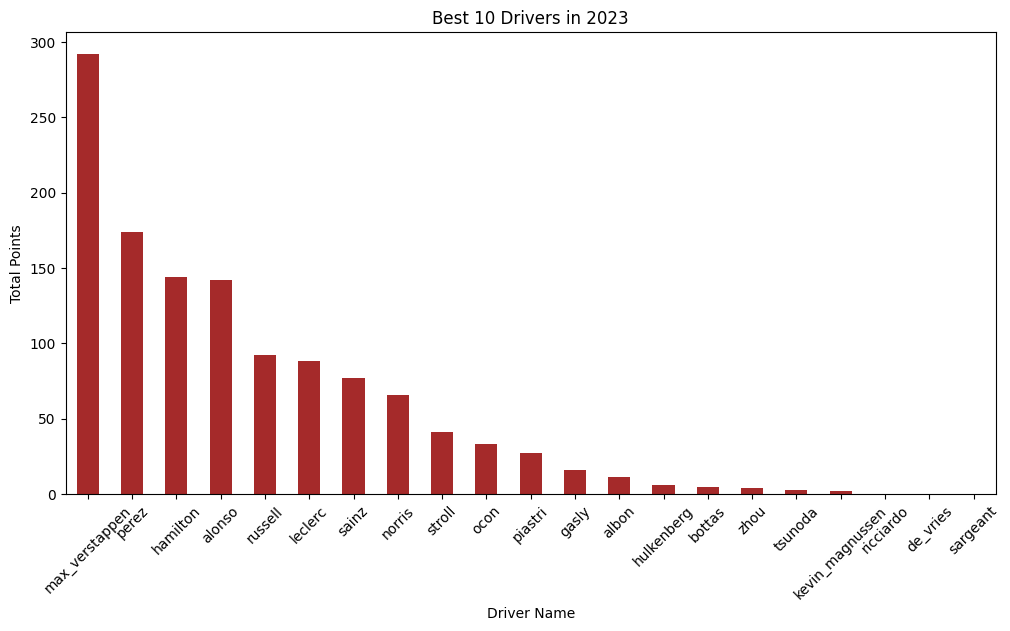

In [15]:
plt.figure(figsize=(12, 6))
sorted_drivers_2023.plot(kind='bar', color='brown')
plt.xlabel('Driver Name')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in 2023')
plt.xticks(rotation=45)
plt.show()

Top 10 overall driver performance

In [16]:
top_drivers = pd.merge(driver_standings, drivers, on='driverId')

top_drivers = top_drivers.groupby('driverRef')['points'].sum()
top_drivers = top_drivers.sort_values(ascending=False).head(10)

In [17]:
print(top_drivers)

driverRef
hamilton              46550.5
vettel                32026.0
max_verstappen        22486.5
alonso                21692.0
bottas                19458.0
raikkonen             19069.0
rosberg               16910.0
michael_schumacher    14514.0
perez                 13756.0
ricciardo             13626.0
Name: points, dtype: float64


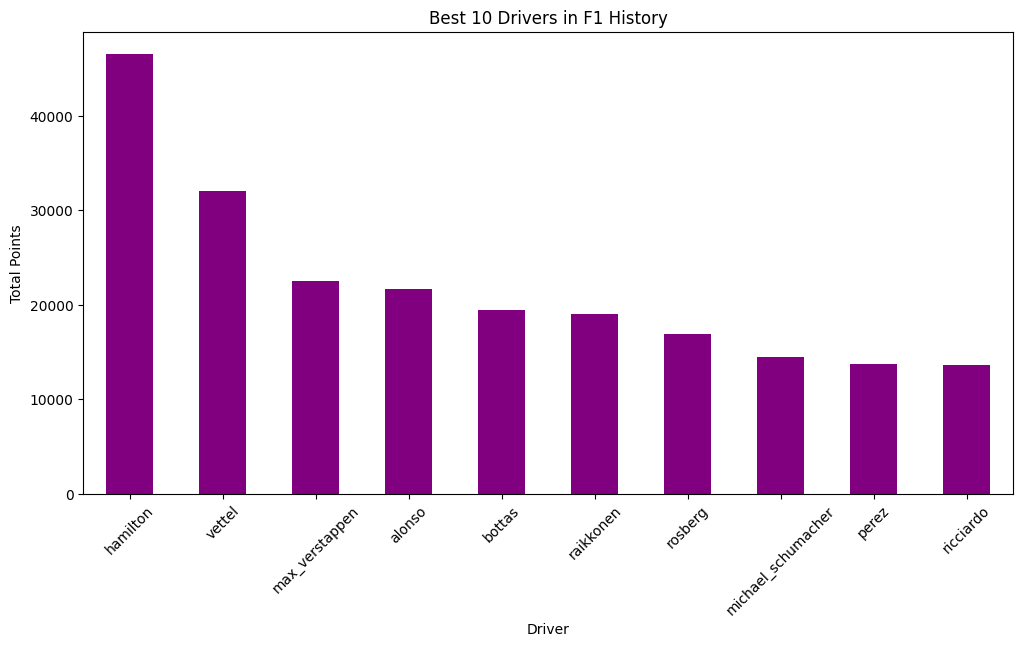

In [18]:
plt.figure(figsize=(12, 6))
top_drivers.plot(kind='bar', color='purple')
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in F1 History')
plt.xticks(rotation=45)
plt.show()

Best Teams overall

In [19]:
the_best_teams=constructors.merge(results,on = 'constructorId',how = 'left')
the_best_teams = the_best_teams[['name','points','raceId']]
the_best_teams = the_best_teams.groupby('name')['raceId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
the_best_teams = the_best_teams[the_best_teams['races'] >= 100]
the_best_teams

,name,races
0,Ferrari,1066
1,McLaren,895
2,Williams,809
3,Tyrrell,433
4,Renault,403
5,Team Lotus,395
6,Sauber,395
7,Red Bull,360
8,Minardi,345
9,Ligier,330


from matplotlib import pyplot as plt
the_best_teams['races'].plot(kind='hist', bins=20, title='races')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
the_best_teams['races'].plot(kind='line', figsize=(8, 4), title='races')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
# prompt: create a column chart with top 10 the_best_teams

import matplotlib.pyplot as plt
the_best_teams.plot.bar(x='name', y='races', color='black', figsize=(10, 5))
plt.title('Top 10 Teams with Most Races')
plt.xlabel('Team Name')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)
plt.show()


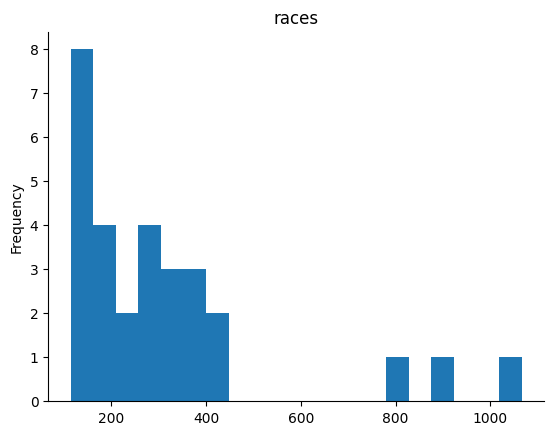

In [30]:
#from matplotlib import pyplot as plt
#the_best_teams['races'].plot(kind='hist', bins=20, title='races')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
top_constructors = pd.merge(results, constructors, on='constructorId', how='left')
top_constructors = top_constructors.groupby('constructorId')['rank'].rank()
#top_constructors = top_constructors.sort_values(ascending=False).head(10)
top_constructors.head()

0    407.5
1     63.0
2    564.0
3    396.5
4     46.5
Name: rank, dtype: float64